# Homogeneous Building Clustering



This notebook generates homogeneous clusters based on KMeans clustering algorithm and the output of the urban morphological metrics obtained through the [Momepy](http://docs.momepy.org/en/stable/) package.

Code version: 0.1

In [1]:
# Import essential libraries 

print("Importing Libraries and packages................")
import geopandas as gpd
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

print("Libraries and packages imported !!!")

Importing Libraries and packages................
Libraries and packages imported !!!


In [2]:
clean_data = pd.read_csv("C:/Msc Research/Thesis Phase/Characterisation Phase 2/Momepy/kollam_tess_55.csv", index_col=0)
clean_blg = gpd.read_file("C:/Msc Research/Thesis Phase/Characterisation Phase 2/Momepy/kollam_tess_55.gpkg", layer="buildings")

C:\Users\User\anaconda3\envs\momepy_env\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [3]:
# View the CSV as a table
clean_data

,uID,stcOri,sdcLAL,sdcAre,sscCCo,sscERI,sicCAR,mtcWNe,mdcAre,ltcBuA,...,ssbSqu,ssbERI,ssbElo,ssbCCM,ssbCCD,stbOri,stbCeA,mtbAli,mtbNDi,ltbIBD
0,0,5.460676,76.225230,2670.691952,0.585243,1.024824,0.012378,0.024403,10598.387677,1.0,...,2.241580e-07,0.825585,0.768971,3.289942,0.538934,0.093556,5.367121,17.834156,32.053255,20.409970
1,1,0.163313,78.121315,1519.715935,0.317054,0.981548,0.032765,0.016386,8891.981109,1.0,...,2.537822e-07,0.817116,0.750193,4.040502,0.693107,0.093719,0.069594,14.834755,14.299112,23.777377
2,2,0.803860,80.603397,3231.877288,0.633371,1.036207,0.021709,0.018172,9427.953606,1.0,...,2.745507e-07,0.737933,0.497899,5.144724,1.383485,2.013462,1.209602,11.012340,28.185854,21.041197
3,3,9.782089,77.762607,3182.512274,0.670098,1.045718,0.024569,0.023155,8078.455546,1.0,...,2.841136e-07,0.741711,0.501274,5.318434,1.801677,5.949055,3.833033,5.467343,14.380401,15.328196
4,4,21.654860,83.986724,3197.492579,0.577163,1.014027,0.026028,0.017815,8295.368046,1.0,...,2.372755e-07,0.845403,0.948399,5.281435,0.613882,15.936284,5.718577,12.649357,18.594592,21.538022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,9715,20.095815,68.214986,957.611920,0.262023,0.887948,0.218430,0.031932,15625.347174,1.0,...,2.336856e+00,1.000796,0.308454,13.604596,0.158054,0.946291,19.149525,2.758091,15.877704,20.759675
9716,9716,7.724318,60.798925,1611.394603,0.555035,1.025680,0.168666,0.036939,17788.311436,1.0,...,4.875281e+00,1.003525,0.372771,14.302013,0.389811,4.803854,2.920464,7.050966,26.806076,21.212846
9717,9717,5.468695,58.968895,1308.517356,0.479119,0.911785,0.392206,0.049244,7990.160134,1.0,...,3.121771e+00,0.997614,0.745203,16.418172,0.459991,4.746308,0.722387,2.290781,14.044010,18.330412
9718,9718,44.707470,63.831734,1976.998882,0.617793,1.048686,0.270032,0.023029,16138.894606,1.0,...,3.108190e-01,1.001368,0.465878,18.668254,0.040384,0.131726,44.575744,1.740963,12.071909,21.597356


<AxesSubplot:>

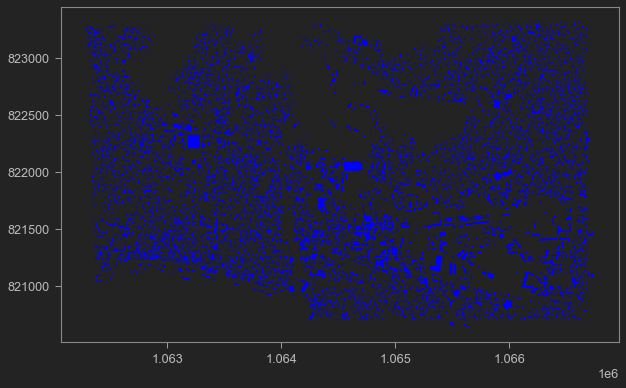

In [7]:
# Check the figure
clean_blg.plot(figsize=(10,10), color="blue")

In [5]:
# To remove the "3" in the headers of the various metric 
# Normalise the data
clean_norm3 = StandardScaler().fit_transform(clean_data) # [[c for c in clean_data.columns if '3' in c]]

In [6]:
# RUN THIS CELL if an error with NaN and Infinity values appear. You will know of this as an "error" in the previous cell.

# Define a function to clean NaN and infinity values if they exist. 
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [8]:
# Convert from an array to a dataframe
clean_norm3_pd = pd.DataFrame(clean_norm3)
clean_dataset(clean_norm3_pd)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.731873,-1.046224,1.364876,1.225679,0.636898,0.704954,-1.545216,-1.639429,0.461571,0.172531,...,-0.242691,0.536316,0.355397,-0.760732,-0.713013,-1.030099,-0.723409,1.464922,1.465303,0.190470
1,-1.731516,-1.457009,1.454785,0.346850,-1.874408,-0.123768,-1.338926,-2.104603,0.180777,0.172531,...,-0.242691,0.471715,0.250510,-0.597813,-0.604104,-1.030083,-1.207075,0.958458,-0.387686,0.883215
2,-1.731160,-1.407338,1.572481,1.654173,1.087565,0.922932,-1.450795,-2.000948,0.268973,0.172531,...,-0.242691,-0.132314,-1.158685,-0.358125,-0.116417,-0.847362,-1.102992,0.313025,1.061665,0.320326
3,-1.730803,-0.711120,1.437776,1.616480,1.431476,1.105061,-1.421860,-1.711845,0.046909,0.172531,...,-0.242691,-0.103489,-1.139830,-0.320419,0.178997,-0.472773,-0.863472,-0.623275,-0.379202,-0.854957
4,-1.730447,0.209555,1.732912,1.627918,0.561234,0.498195,-1.407101,-2.021686,0.082603,0.172531,...,-0.242691,0.687496,1.357596,-0.328450,-0.660069,0.477809,-0.691321,0.589443,0.060630,0.422533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,1.730447,0.088659,0.985044,-0.082346,-2.389712,-1.916163,0.539717,-1.202525,1.288773,0.172531,...,0.205126,1.872868,-2.216834,1.478211,-0.982069,-0.948935,0.534928,-1.080745,-0.222930,0.262411
9716,1.730803,-0.870690,0.633388,0.416851,0.354028,0.721352,0.036176,-0.912047,1.644695,0.172531,...,0.691569,1.893686,-1.857587,1.629596,-0.818355,-0.581773,-0.946790,-0.355872,0.917658,0.355638
9717,1.731160,-1.045603,0.546611,0.185589,-0.356841,-1.459688,2.298065,-0.198045,0.032380,0.172531,...,0.355540,1.848591,0.222638,2.088939,-0.768779,-0.587251,-1.147475,-1.159653,-0.414311,-0.237339
9718,1.731516,1.997173,0.777198,0.696009,0.941695,1.161890,1.061852,-1.719120,1.373278,0.172531,...,-0.183128,1.877234,-1.337535,2.577351,-1.065192,-1.026466,2.856349,-1.252492,-0.620138,0.434739


<AxesSubplot:xlabel='n_cluster', ylabel='silhouette'>

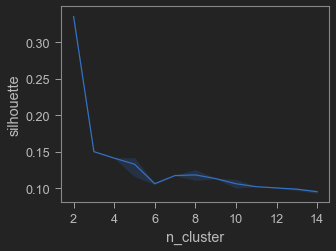

In [9]:
s = {}
for n in range(2, 15):
    s[n] = []
    for r in range(5):
        kmeans = KMeans(n_clusters=n, random_state=r).fit(clean_norm3)
        labels = kmeans.labels_
        s[n].append(metrics.silhouette_score(clean_norm3, labels, metric='euclidean'))

vals = []
clus = []

for c, v in s.items():
    vals += v
    clus += [c] * 5

silhouettes3_clean = pd.DataFrame({'n_cluster': clus, 'silhouette': vals})
sns.lineplot(x="n_cluster", y="silhouette",
             data=silhouettes3_clean)

<AxesSubplot:>

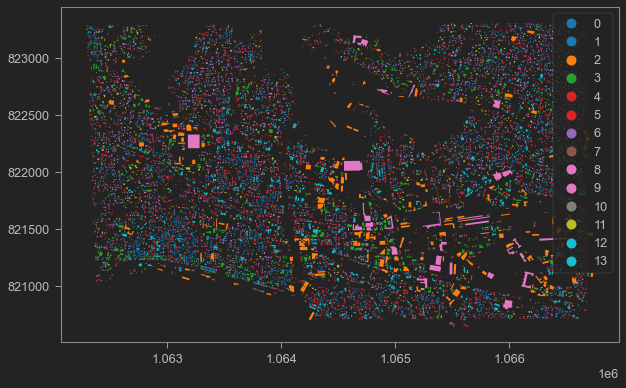

In [10]:
# Display
kmeans4 = KMeans(n_clusters=4, random_state=1).fit(clean_norm3)
clean_blg.plot(kmeans.labels_, figsize=(10,10), categorical=True, legend=True)

<AxesSubplot:>

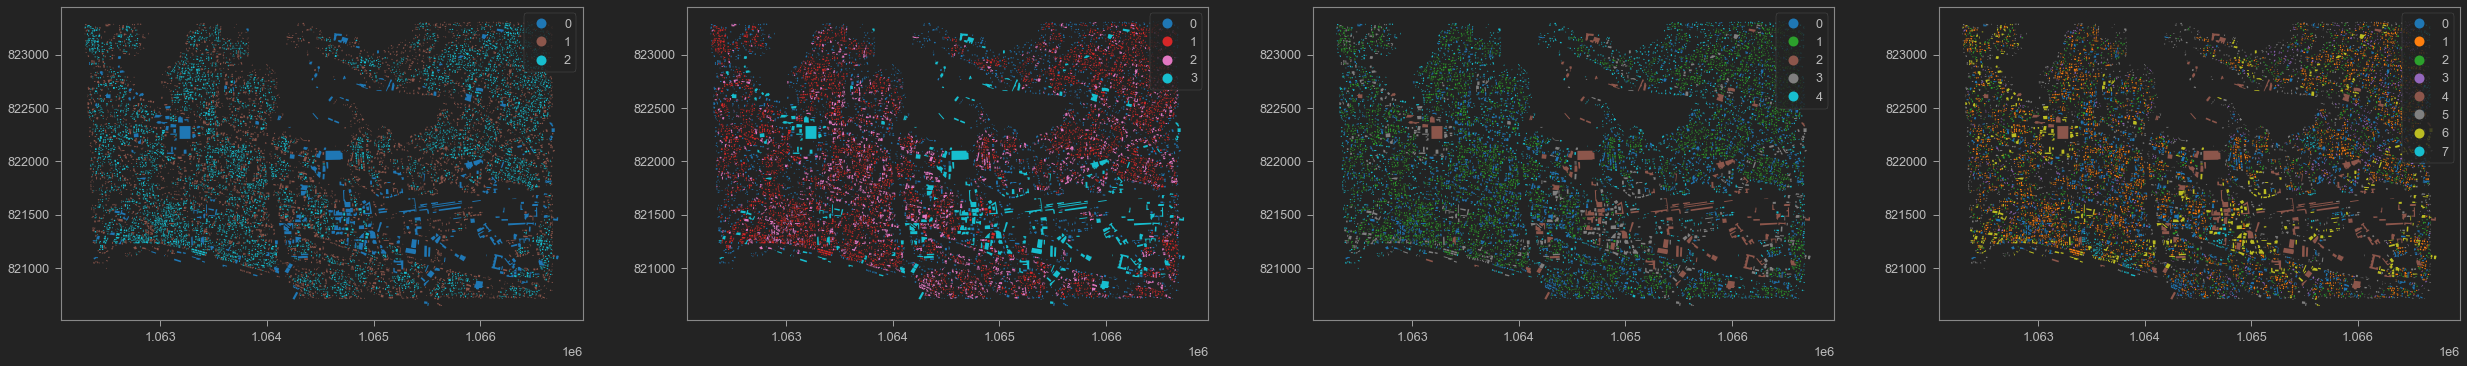

In [11]:
#Plot using matplotlib
fig, axs = plt.subplots(1, 4,figsize=(43,40))

kmeans3 = KMeans(n_clusters=3, random_state=1).fit(clean_norm3)
clean_blg.plot(kmeans3.labels_, figsize=(30,30), categorical=True, legend=True, ax=axs[0])

kmeans4 = KMeans(n_clusters=4, random_state=1).fit(clean_norm3)
clean_blg.plot(kmeans4.labels_, figsize=(30,30), categorical=True, legend=True, ax=axs[1])

kmeans5 = KMeans(n_clusters=5,random_state=1).fit(clean_norm3)
clean_blg.plot(kmeans5.labels_, figsize=(30,30), categorical=True, legend=True, ax=axs[2])

kmeans8 = KMeans(n_clusters=8,random_state=1).fit(clean_norm3)
clean_blg.plot(kmeans8.labels_, figsize=(30,30), categorical=True, legend=True, ax=axs[3])

# kmeans12 = KMeans(n_clusters=12,random_state=1).fit(clean_norm3)
# clean_blg.plot(kmeans12.labels_, figsize=(30,30), categorical=True, legend=True, ax=axs[3])

In [12]:
kmeans4

KMeans(n_clusters=4, random_state=1)

In [12]:
# Convert the desired kmeans cluster labels from an np array to a geopandas dataframe
dataframe = gpd.GeoDataFrame(kmeans8.labels_, columns=["K-means Label"])

In [13]:
dataframe # Here, we can see that the dataframe of the clusters does not contain any geometry/coordinates. So, we need add them

,K-means Label
0,5
1,5
2,5
3,5
4,5
...,...
9715,6
9716,6
9717,6
9718,6


In [14]:
# Collect the geometry column from the building shapefile 'clean_blg'
geom_col = clean_blg.loc[:, "geometry"]

# Add the created column to the "dataframe" gdf and inject the coordinates using the CRS EPSG code
dataframe["geometry"] = geom_col
dataframe = gpd.GeoDataFrame(dataframe, crs='EPSG:7781')

# Show the new table with the geometry column
dataframe

,K-means Label,geometry
0,5,"POLYGON ((1066490.667 823313.547, 1066491.257 ..."
1,5,"POLYGON ((1066604.094 823314.622, 1066604.241 ..."
2,5,"POLYGON ((1066575.184 823314.130, 1066575.627 ..."
3,5,"POLYGON ((1066245.818 823312.555, 1066245.965 ..."
4,5,"POLYGON ((1066445.679 823313.770, 1066447.744 ..."
...,...,...
9715,6,"POLYGON ((1065280.864 821003.978, 1065288.847 ..."
9716,6,"POLYGON ((1065303.777 820996.252, 1065314.114 ..."
9717,6,"POLYGON ((1065285.898 820965.959, 1065312.987 ..."
9718,6,"POLYGON ((1065221.876 820985.726, 1065255.638 ..."


In [16]:
# Now that the coordinates are infused within the dataframe, we can now export it for the next phase of the characterisation (intersection with building tags)
# dataframe.to_file("C:/Msc Research/Thesis Phase/Characterisation Phase 2/Momepy/clustered_buildings_8clusters.gpkg", driver="GPKG", layer="buildings")
dataframe.to_file("C:/Msc Research/Thesis Phase/Characterisation Phase 2/Momepy/clustered_buildings_8clusters.shp")

## Silhouette Analysis on KMeans Clustering

[Link to the site](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py) 

For n_clusters = 4 The average silhouette_score is : 0.17906184635909816
For n_clusters = 8 The average silhouette_score is : 0.09921477729612717


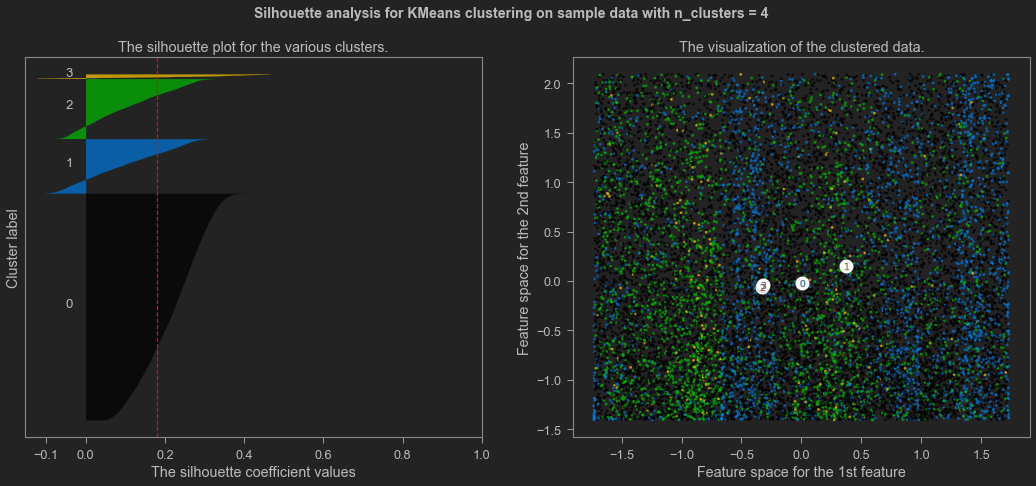

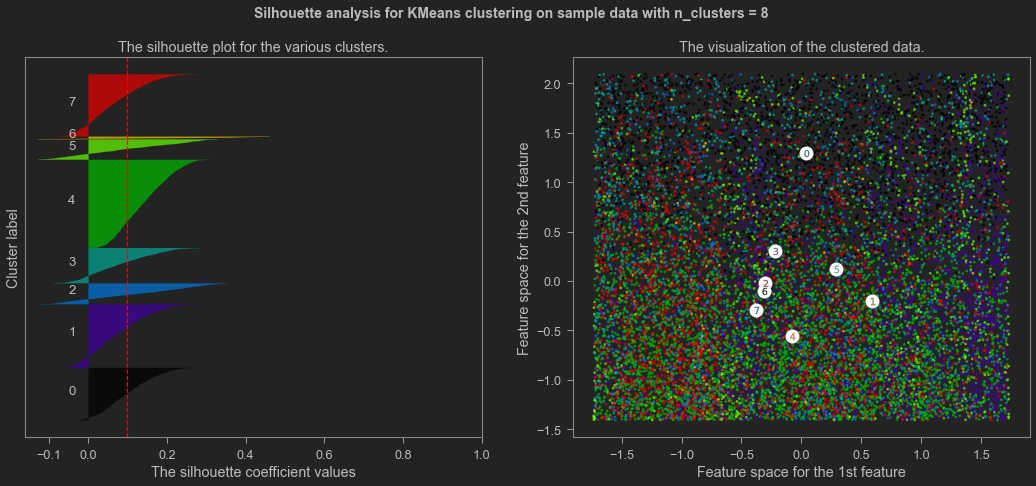

In [17]:
# Visualise the silhouette scores

range_n_clusters = [4,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range between -1 and 1.
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(clean_norm3)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(clean_norm3, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(clean_norm3, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(clean_norm3[:, 0], clean_norm3[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')